In [6]:
import torch
import matplotlib.pyplot as plt
from dataload import *
from models import *

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Parameters

Loaded image shape in tensor: torch.Size([16, 3, 224, 224])


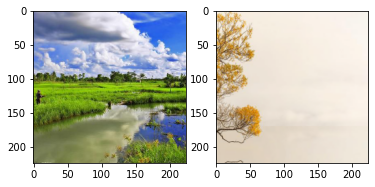

In [7]:
batch_size = 16

train_loader, test_loader = define_landscapes_loaders(batch_size, batch_size, 
                                                      rescale=256, crop=224)

z_dim = 128

# get minibatch
x = next(iter(train_loader))
x_test = next(iter(test_loader))

print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = x[0].numpy().transpose((1, 2, 0))
img2 = x_test[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

## Test trained model

<All keys matched successfully>

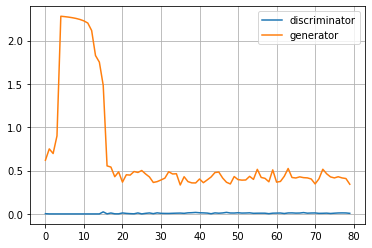

In [8]:
import pandas as pd
fichier = "gan"


model = Generator_224(z_dim).to(device)
losses = pd.read_csv(f"saved_models/{fichier}.csv")
plt.plot(losses.index, losses["discriminator"], label = "discriminator")
plt.plot(losses.index, losses["generator"], label = "generator")
plt.legend()
plt.grid()
model.load_state_dict(torch.load(f"saved_models/{fichier}_generator.sav"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape : torch.Size([16, 3, 224, 224])


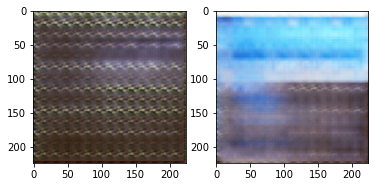

In [9]:
x = torch.randn(batch_size, z_dim)

fig,axes = plt.subplots(1,2)
x = x.to(device)
generated = model(x)
print(f"Shape : {generated.shape}")
axes[0].imshow(generated[0].cpu().detach().numpy().transpose((1, 2, 0)))
axes[1].imshow(generated[1].cpu().detach().numpy().transpose((1, 2, 0)))